In [46]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
data= pd.read_csv("HousingData.csv")
target = data ['MEDV']

In [49]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [50]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [51]:
data.shape

(506, 14)

In [52]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [53]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [54]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [55]:
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [56]:
data.fillna(value=data.mean(), inplace=True)
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [57]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
corr = data.corr()
corr.shape

(14, 14)

<Axes: >

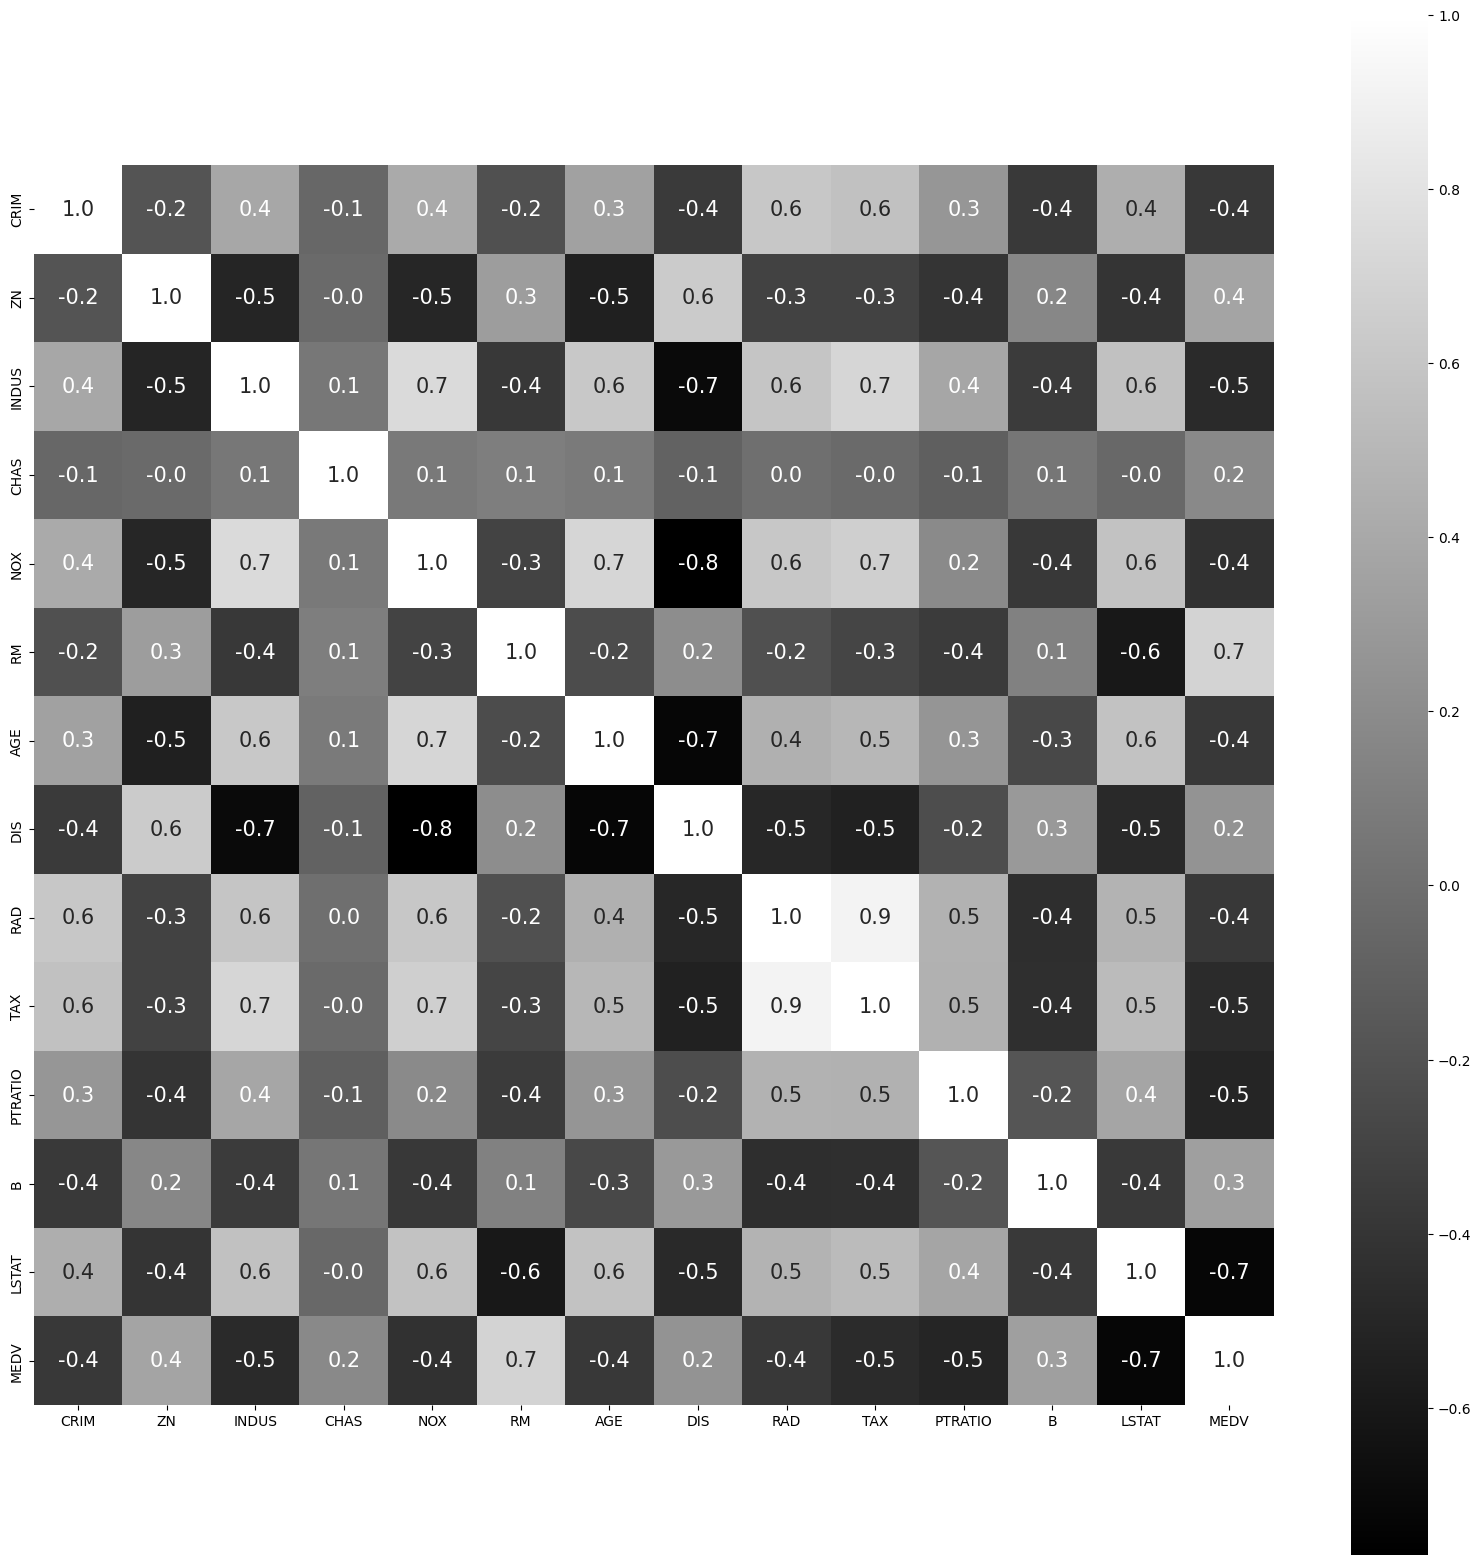

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='gray')

In [60]:
X = data
y = target

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
lm.intercept_

-2.0250467969162855e-13

In [65]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.0
1,ZN,0.0
2,INDUS,-0.0
3,CHAS,-0.0
4,NOX,0.0
5,RM,0.0
6,AGE,0.0
7,DIS,-0.0
8,RAD,0.0
9,TAX,0.0


In [66]:
y_pred = lm.predict(X_train)

In [67]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 2.084961205567243e-14
MSE: 8.348733345176318e-28
RMSE: 2.8894174750589984e-14


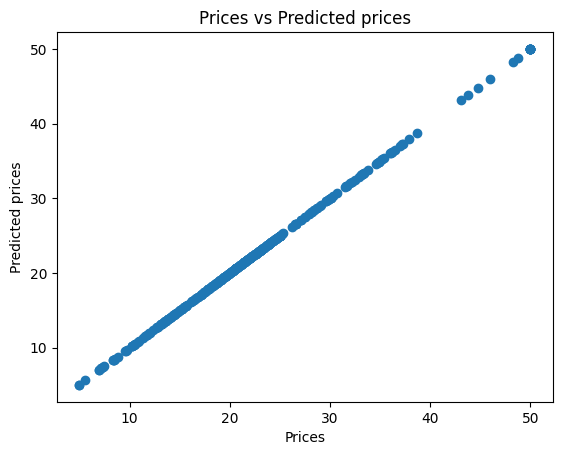

In [68]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

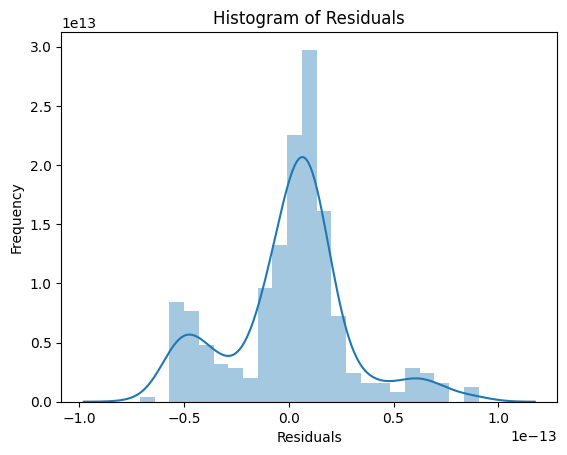

In [69]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [70]:
y_test_pred = lm.predict(X_test)

In [71]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 1.0
Adjusted R^2: 1.0
MAE: 2.053328267648842e-14
MSE: 8.623702858891067e-28
RMSE: 2.9366141828457936e-14


In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =14))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [74]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 529.4440
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 424.4623
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 252.4671
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 85.9452
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 53.6948
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 31.1077
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 22.0465
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 17.7839
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 14.7909
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 12.2516
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 10.3585
Epoch 12/100
12/12 [==============================] - 0s 3ms/step - loss: 8.9027
Epoch 13/100
12/12 [===

In [75]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [76]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9889764838748563


In [77]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

1.0728822631527253
